# Homework Assignment 3, Part 2

Complete the following exercises. 

# When you are finished, double click on the cell below and type your full name to indicate that **you completed all exercises with academic integrity**. 

Rakeb Abraham Jebessa



## Exercise 1: More with Trial Running Times

In Activity 10 you created a graph to compare the running times of the three summation functions

```python
def f1(n):
    the_sum = 0
    for i in range(n):
        the_sum += 2*i + 1

    return the_sum

def f2(n):
    i = 1
    the_sum = 0
    while i < 2*n:
        the_sum += i
        i += 2

    return the_sum

def f3(n):
    the_sum = n**2
    return the_sum

```


### Multiple Choice Question 1

What is the Big O running time of `f1`?

* (A) $T(n) = 1 + n$
* (B) $T(n) = 2 + 2n$
* (C) $O(1)$
* (D) $O(n)$
* (E) None of the above


In [3]:
mcanswer_1= "D"   # enter your answer inside the string quotes: A, B, C, D, or E

In [4]:
assert mcanswer_1 in ['A', 'B', 'C', 'D', 'E']
#This autograder has a hidden test, for obvious reasons :)

### Multiple Choice Question 2

What is the Big O running time of `f3`?

* (A) $T(n) = 1 + n$
* (B) $T(n) = 2 + 2n$
* (C) $O(1)$
* (D) $O(n)$
* (E) None of the above

In [5]:
mcanswer_2= "C"   # enter your answer inside the string quotes: A, B, C, D, or E

In [6]:
assert mcanswer_2 in ['A', 'B', 'C', 'D', 'E']
#This autograder has a hidden test, for obvious reasons :)

### Benchmarking as $n$ varies

In addition to comparing the running times of the summation functions, we could consider the running times of the functions as the size of the problem, $n$, increases. In what follows we will set up an experiment to investigate the running time of `f1` as $n$ increases. 

First, we define a reusable test function for benchmarking a function `n_func` over a sequence of inputs ``number_list``. Here `n_func` is any function expecting an integer parameter $n$, and `number_list` is a list of $n$ values.

In [7]:
import random, time
def test_n(n_func, number_list):
    """
    Performs a trial of the following experiment for each n in `number_list`. 
    For each n, the output of `n_func` is printed to the screen, along with 
    the value of n, and the time the trial took.
    A list of the trial times for each n will be returned.
    """
    times = []
    for n in number_list:
        start = time.time()
        result = n_func(n)
        end = time.time()
        microseconds = 10**6 * (end - start) # 1 sec = 10^6 microseconds
        times.append(microseconds)
        print(f"For n = {n:2d}: Result is {result:4d} and required {microseconds:10.7f} microseconds")
    return times


The following cell applies the benchmarking test to `f1` using the given list of problem sizes. 

In [8]:
input_sizes = [1, 1000, 2000, 3000, 4000, 5000]

def f1(n):
    the_sum = 0
    for i in range(n):
        the_sum += 2*i + 1

    return the_sum

f1_times = test_n(f1, input_sizes)

For n =  1: Result is    1 and required  1.4305115 microseconds
For n = 1000: Result is 1000000 and required 90.8374786 microseconds
For n = 2000: Result is 4000000 and required 308.2752228 microseconds
For n = 3000: Result is 9000000 and required 327.5871277 microseconds
For n = 4000: Result is 16000000 and required 369.7872162 microseconds
For n = 5000: Result is 25000000 and required 529.0508270 microseconds


### Benchmarking  `f3`
Mimicking the experiment for `f1` above, apply the benchmarking test to the other summing function `f3`. Use the same list of `input_sizes` as above. 

In [9]:
# Benchmark f3() and storing the results in f3_times

input_sizes = [1, 1000, 2000, 3000, 4000, 5000]

def f3(n):
    the_sum = n**2
    return the_sum

f3_times = test_n(f3, input_sizes)


For n =  1: Result is    1 and required  1.9073486 microseconds
For n = 1000: Result is 1000000 and required  0.9536743 microseconds
For n = 2000: Result is 4000000 and required  0.7152557 microseconds
For n = 3000: Result is 9000000 and required  0.4768372 microseconds
For n = 4000: Result is 16000000 and required  0.7152557 microseconds
For n = 5000: Result is 25000000 and required  0.4768372 microseconds


In [10]:
# Check that the benchmarking test was properly applied to f3
from nose.tools import assert_equal
assert_equal(len(f3_times), len(input_sizes))
assert(sum(f3_times)<sum(f1_times))

### Visualizing Summation Functions

Use matplotlib to graphically compare the results of the benchmarking tests for `f1` and `f3`. 

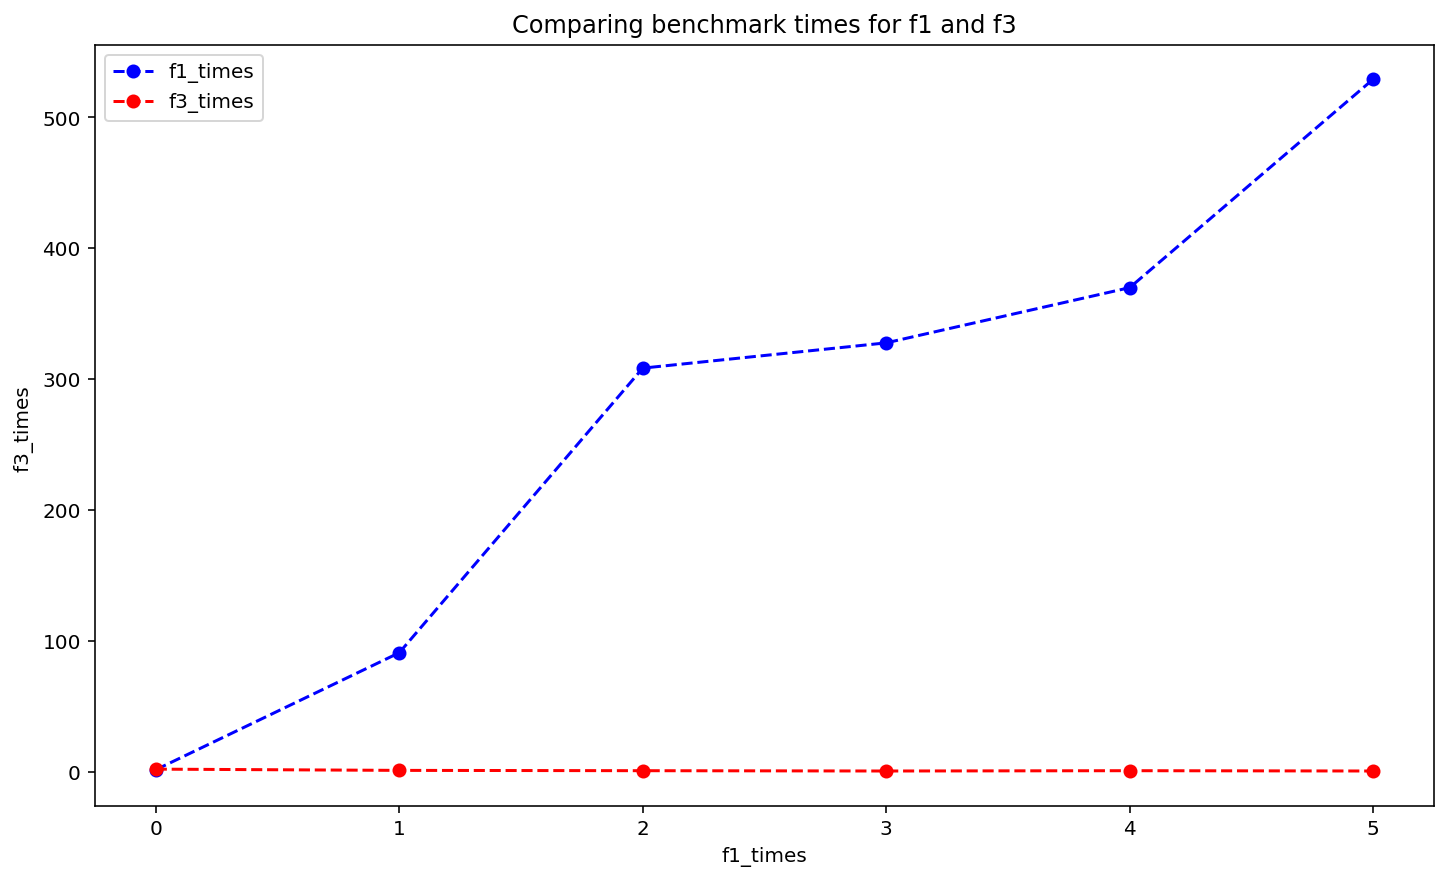

In [11]:
# Produce a nice plot with a title, axes-labels and a legend comparing the benchmark times for comparing f1 and f3
import matplotlib.pyplot as p

p.plot ( f1_times , color = "blue" , marker = "o" , linestyle = "dashed" , label = "f1_times" )
p.plot ( f3_times , color = "red" , marker = "o" , linestyle = "dashed" , label = "f3_times" )

p.title ( "Comparing benchmark times for f1 and f3" )
p.xlabel ( "f1_times" )
p.ylabel ( "f3_times " )
p.legend () # show the labels
p.show ()

## Exercise 2: Visualizing Big O functions

In Activity 11 you determined the Big O runtime for various algorithms. In Activity 12 you created plots of average runtimes for methods as the size of the problem, $n$ increases.  In the next cell, design and implement a program which graphically compares functions with the following Big O running times:

1. A function `f_const` with constant Big O runtime
2. A function `f_log` with logarithmic Big O runtime
3. A function `f_lin` with linear Big O runtime
4. A function `f_loglin` with log linear Big O runtime
5. A function `f_quad` with quadratic Big O runtime

Your graph should plot average runtimes versus various input sizes $n$. Adjust your list of `input_sizes` to yield a graph clearly depicting the nature of the relationships between the different running times.

*Make sure your graph includes appropriate labels, a title, etc.*

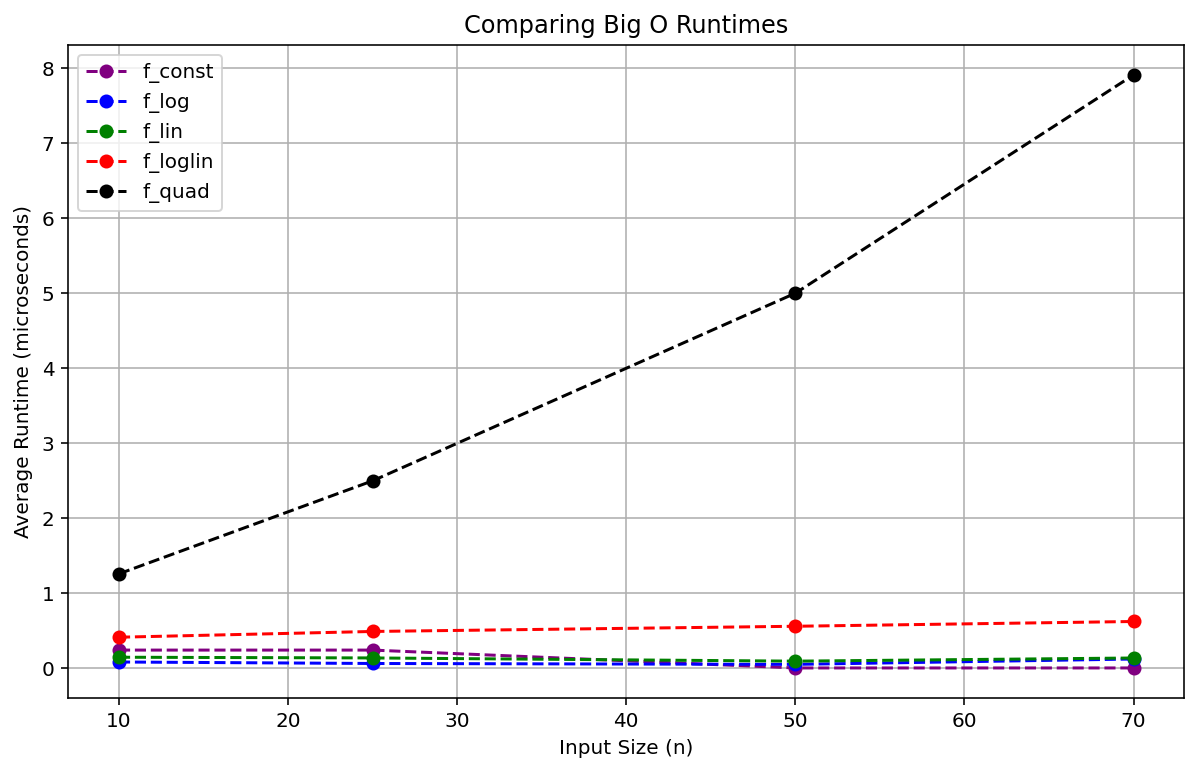

In [13]:
# Graphically comparing functions with varying Big O running times
import time
import matplotlib.pyplot as plt

def f_const(n):
    start = time.time()
    result = 1
    end = time.time()
    microsecond = (end - start) * 10**6
    avg_runtime_const = microsecond
    return avg_runtime_const
    
def f_log(n):
    avglog = []
    while n > 1:
        start = time.time()
        n = n // 2
        end = time.time()
        microsecond = (end - start) * 10**6
        avglog.append(microsecond)
    avg_runtime_log = sum(avglog)/ len(avglog)
    return avg_runtime_log
def f_lin(n):
    avglin = []
    k = 0
    for i in range(n):
        start = time.time()
        k+= i
        end = time.time()
        microsecond = (end - start) * 10**6
        avglin.append(microsecond)
    avg_runtime_lin = sum(avglin) / len(avglin)
    return avg_runtime_lin
    
def f_loglin(n):
    avgloglin = []
    for i in range(n):
        start = time.time()
        while i > 0:
            i = i // 2
            end = time.time()
            microsecond = (end - start) * 10**6
            avgloglin.append(microsecond)
    avg_runtime_loglin = sum(avgloglin) / len(avgloglin)
    return avg_runtime_loglin
def f_quad(n):
    avgquad = []
    for i in range(n):
        start = time.time()
        for j in range(n):
            k= 1+3
            m = 2+3
            end = time.time()
            microsecond = (end - start) * 10**6
            avgquad.append(microsecond)
    avg_runtime_quad = sum(avgquad) / len(avgquad)
    return avg_runtime_quad



input_size = [10, 25, 50, 70]

avg_const = []
avg_log = []
avg_lin = []
avg_loglin=[]
avg_quad= []

for n in input_size:
    avg_const.append(f_const(n))
    avg_log.append(f_log(n))
    avg_lin.append(f_lin(n))
    avg_loglin.append(f_loglin(n))
    avg_quad.append(f_quad(n))
    
plt.figure(figsize=(10, 6))

plt.plot(input_size, avg_const, color = "purple", marker = "o", linestyle = "dashed", label = "f_const")
plt.plot(input_size, avg_log, color = "blue", marker = "o", linestyle = "dashed", label = "f_log")
plt.plot(input_size, avg_lin, color = "green", marker = "o", linestyle = "dashed", label = "f_lin")
plt.plot(input_size, avg_loglin, color = "red", marker = "o", linestyle = "dashed", label = "f_loglin")
plt.plot(input_size, avg_quad, color = "black", marker = "o", linestyle = "dashed", label = "f_quad")

plt.xlabel('Input Size (n)')
plt.ylabel('Average Runtime (microseconds)')
plt.legend()
plt.title('Comparing Big O Runtimes')
plt.grid(True)

plt.show()


        
    

